In [1]:
# Import dependicies and setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

output_data_file = "sorted.csv"

In [2]:
# Import csv
csv = pd.read_csv('2012-18_officialBoxScore.csv')
# csv.head()

In [3]:
# Make dataframe with columns needed
nba_df = csv[["gmDate", "gmTime", "offLNm", "offFNm", "teamAbbr", "teamDiv", "teamLoc", "teamRslt", "teamPTS", "teamTO", "teamSTL", "teamBLK", "teamPF", "teamFGA", "teamFGM", "teamFG%", "teamFTA", "teamFTM", "teamFT%", "teamTRB", "teamSTL%", "teamBLK%", "teamBLKR"]]

In [4]:
# Convert date to datetime
nba_df['gmDate'] = pd.to_datetime(nba_df["gmDate"])

# df['Date']= pd.to_datetime(df['Date']) 

#df.dtypes
nba_df = nba_df.sort_values("gmDate")
nba_df.head()

c:\users\jplum\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gmDate,gmTime,offLNm,offFNm,teamAbbr,teamDiv,teamLoc,teamRslt,teamPTS,teamTO,...,teamFGA,teamFGM,teamFG%,teamFTA,teamFTM,teamFT%,teamTRB,teamSTL%,teamBLK%,teamBLKR
0,2012-10-30,19:00,Brothers,Tony,WAS,Southeast,Away,Loss,84,13,...,90,32,0.3556,20,12,0.6000,39,12.3678,11.2434,17.2414
17,2012-10-30,22:30,Dalen,Eric,LAL,Pacific,Home,Loss,91,14,...,77,38,0.4935,31,12,0.3871,46,6.5517,5.4598,7.8125
16,2012-10-30,22:30,Zielinski,Gary,LAL,Pacific,Home,Loss,91,14,...,77,38,0.4935,31,12,0.3871,46,6.5517,5.4598,7.8125
15,2012-10-30,22:30,Foster,Scott,LAL,Pacific,Home,Loss,91,14,...,77,38,0.4935,31,12,0.3871,46,6.5517,5.4598,7.8125
13,2012-10-30,22:30,Zielinski,Gary,DAL,Southwest,Away,Win,99,12,...,85,40,0.4706,18,14,0.7778,40,9.8276,5.4598,7.1429


In [ ]:
# # Grouping games by date and time 
# nba_df["gmDateTime"] = nba_df["gmDate"].astype(str) + " " + nba_df["gmTime"].astype(str)

# # print(nba_df['gmDateTime'])

# nba_df_groupby = nba_df.groupby("gmDateTime")

In [5]:
# Home and Away Sort
sorted_df = nba_df.sort_values(["gmDate", "gmTime"], ascending=[True,True]).drop_duplicates(subset=["gmDate", "teamAbbr"])

In [6]:
#turn date into unix timestamp
sorted_df["timestamp"] = sorted_df["gmDate"].astype('int64')//1e9

# sorted_df.to_csv(output_data_file, index=False)

In [11]:
winners = sorted_df.loc[(sorted_df["teamRslt"] == "Win")]
winner_fouls = winners['teamPF'].mean()
winner_fouls

19.625965577991597

In [10]:
losers = sorted_df.loc[(sorted_df["teamRslt"] == "Loss")]
loser_fouls = losers['teamPF'].mean()
loser_fouls

20.63260604417943

In [12]:
winner_fta = winners['teamFTA'].mean()
winner_fta

23.678140669467407

In [13]:
loser_fouls = losers['teamFTA'].mean()
loser_fouls

21.912318742377018

In [ ]:
# Fouls difference influence on point difference.
# Fouls related to turnover
# Foul Count vs Win Percentage
# Fouls by Region
# Fould by Division
# Fouls by day of week

<Figure size 2880x360 with 0 Axes>

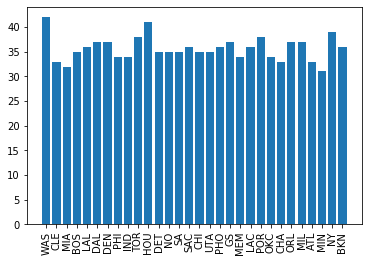

<Figure size 2880x360 with 0 Axes>

In [19]:
team_fg_percent = sorted_df['teamFGM']/sorted_df['teamFGA']

# x_axis = sorted_df['teamPF']
# y_axis = team_fg_percent
x_axis = sorted_df['teamAbbr']
y_axis = sorted_df['teamPF']

plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.figure(figsize=(40, 5))

In [ ]:
# Foul Count vs Field Goal Percentage
foul_vs_fg = nba_df.loc[['teamPF','teamFG%']]
foul_vs_fg

In [18]:
# Fouls for Official for time of year

season_17_18_before = sorted_df.loc[(sorted_df["timestamp"] >= 1508198300) & (sorted_df["timestamp"] <= 1523404800)]

total_fouls_before = season_17_18['teamPF'].sum()

# .groupby(['offLNm','offFNm'])

# pd.plot(x, y, titles)

# Establish bins for before all star break and after all star break
season_17_18_bins = [1508198300, 1518652800, 1523404800]
# bins = pd.date_range('2017-10-17', freq='4M', periods=2)
# bins.astype(np.int64)//10**9

# Create group names for bins
group_names = ["Before", "After"]

# Create new data frame with Age Group column
season_17_18["All Star"] = pd.cut(season_17_18["timestamp"], season_17_18_bins, labels=group_names)
all_star_17_18 = season_17_18.groupby('All Star')

fouls_before = total number of fouls before all star break
fouls_after = total number of fouls after all star break

# age_count = age_group["SN"].nunique()
# age_percentage = ((age_count/player_count)*100)

age_demographics = pd.DataFrame({'Seasons': age_count,
                                 'Fouls befre': age_percentage
                                'Fouls after': fouls after})

all_star_17_18.head(40)
# season_17_18.head()
# 02-15-year season mid
# total_fouls

c:\users\jplum\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,gmDate,gmTime,offLNm,offFNm,teamAbbr,teamDiv,teamLoc,teamRslt,teamPTS,teamTO,...,teamFG%,teamFTA,teamFTM,teamFT%,teamTRB,teamSTL%,teamBLK%,teamBLKR,timestamp,All Star
36913,2017-10-17,10:30,Garretson,Ron,HOU,Southwest,Away,Win,122,13,...,0.4845,19,13,0.6842,43,8.7795,4.8775,8.9286,1.508198e+09,Before
36917,2017-10-17,10:30,Foster,Scott,GS,Pacific,Home,Loss,121,17,...,0.5375,21,19,0.9048,41,4.8775,8.7795,18.0000,1.508198e+09,Before
36907,2017-10-17,8:00,Smith,Michael,BOS,Atlantic,Away,Loss,99,12,...,0.4091,25,19,0.7600,46,10.9692,3.9888,7.1429,1.508198e+09,Before
36910,2017-10-17,8:00,Smith,Michael,CLE,Central,Home,Win,102,17,...,0.4578,25,21,0.8400,50,2.9916,3.9888,6.5574,1.508198e+09,Before
36983,2017-10-18,10:00,Richardson,Derek,SAC,Pacific,Home,Loss,100,18,...,0.4773,10,8,0.8000,42,5.1144,4.0915,6.1538,1.508285e+09,Before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42241,2018-02-24,10:00,Buchert,Nick,SAC,Pacific,Home,Loss,108,11,...,0.4468,17,11,0.6471,48,5.3032,5.3032,7.2464,1.519430e+09,After
42196,2018-02-24,5:00,Twardoski,Scott,ORL,Southeast,Away,Loss,105,14,...,0.4524,19,16,0.8421,33,7.2190,5.1564,9.4340,1.519430e+09,After
42199,2018-02-24,5:00,Twardoski,Scott,PHI,Atlantic,Home,Win,116,14,...,0.5185,27,23,0.8519,45,5.1564,3.0938,5.5556,1.519430e+09,After
42202,2018-02-24,7:30,Tiven,Josh,MEM,Southwest,Away,Loss,89,19,...,0.4375,17,14,0.8235,40,7.3687,3.1580,4.3478,1.519430e+09,After


In [ ]:
# Find number of fouls by ref per team
grouped_nba = nba_df.groupby(["offLNm", "offFNm", "teamAbbr"])
grouped_nba["teamPF"].sum()
by_ref = pd.DataFrame(grouped_nba["teamPF"].sum())
by_ref.head(50)

In [ ]:
# Grouping games by date and time 
# nba_df["gmDateTime"] = nba_df["gmDate"].astype(str) + " " + nba_df["gmTime"].astype(str)

# print(nba_df['gmDateTime'])

nba_df_groupby = nba_df.groupby("gmDateTime")

# Concatenating unique referees' names
# nba_df["offFL"] = nba_df["offFNm"].astype(str) + " " + nba_df["offLNm"].astype(str)

print(nba_df['offFL'])

In [ ]:
first_names = nba_df["offFNm"].unique().astype(str)
last_names = nba_df["offLNm"].unique().astype(str)
teamAbbr = nba_df["teamAbbr"].unique().astype(str)
regions = nba_df["teamDiv"].unique().astype(str)
regions

In [ ]:
# Full referee names concatenated together
ref_names = [None] * len(first_names)
for x in range(len(first_names)):
    ref_names[x] = first_names[x] + " " + last_names[x]

In [ ]:
# Establishing dictionary for recording fouls-per-team-per-official
foul_by_team_reset = {'WAS':0, 'CLE':0, 'BOS':0, 'MIA':0, 'DAL':0, 'LAL':0, 'DEN':0, 'PHI':0, 'IND':0,
       'TOR':0, 'HOU':0, 'DET':0, 'SAC':0, 'CHI':0, 'SA':0, 'NO':0, 'UTA':0, 'GS':0, 'PHO':0,
       'MEM':0, 'LAC':0, 'POR':0, 'OKC':0, 'ORL':0, 'CHA':0, 'MIL':0, 'ATL':0, 'NY':0,
       'MIN':0, 'BKN':0}
foul_by_team = {'WAS':0, 'CLE':0, 'BOS':0, 'MIA':0, 'DAL':0, 'LAL':0, 'DEN':0, 'PHI':0, 'IND':0,
       'TOR':0, 'HOU':0, 'DET':0, 'SAC':0, 'CHI':0, 'SA':0, 'NO':0, 'UTA':0, 'GS':0, 'PHO':0,
       'MEM':0, 'LAC':0, 'POR':0, 'OKC':0, 'ORL':0, 'CHA':0, 'MIL':0, 'ATL':0, 'NY':0,
       'MIN':0, 'BKN':0}
# Establishing dictionary for recording fouls-per-region-per-referee
foul_by_region_reset = {'Southeast':0, 'Central':0, 'Atlantic':0, 'Southwest':0, 'Pacific':0,
       'Northwest':0}
foul_by_region = {'Southeast':0, 'Central':0, 'Atlantic':0, 'Southwest':0, 'Pacific':0,
       'Northwest':0}


In [ ]:
# Find number of fouls by ref per team
# Fouls difference influence on point difference.
# Foul Count vs Field Goal Percentage
# Fouls related to turnover
# Foul Count vs Win Percentage
# Foul Count in relation to Player?
# Fouls by Official per Region
# Fouls for Official for time of year
# Fouls by day of week

In [ ]:
# Nested loops to sum fouls per team per referee
for row in nba_df:
    for ref in ref_names:
        for team in teamAbbr:
            if ref == nba_df["offFL"] & team == nba_df["teamAbbr"]:
                    fl_by_team[team] += nba_df["teamPF"]